In [1]:
# import all the necessary modules
# @author : zabir-nabil
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Activation, Lambda
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
import scipy
import math

Using TensorFlow backend.


In [2]:
# import the pose estimation model and processing module
from PoseEstimationModel import *
from PoseEstimationProcessing import *

In [28]:
# load the pre-trained weights
pe = PoseEstimationModel('model.h5') 
# download the pre-trained weights
# https://drive.google.com/file/d/1n-H_cvTHNldZuz08EE62WiVtqqXzemKq/view?usp=sharing
pemodel = pe.create_model() # create the model
pemodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, None, None, 6 1792        lambda_2[0][0]                   
__________________________________________________________________________________________________
activation_81 (Activation)      (None, None, None, 6 0           conv1_1[0][0]                    
__________________________________________________________________________________________________
conv1_2 (C

(900, 1350, 3)


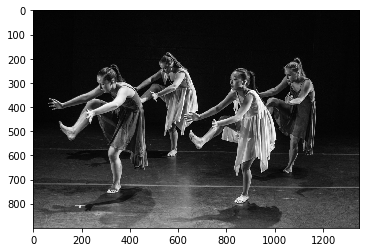

In [15]:
%matplotlib inline
import cv2
import matplotlib
import pylab as plt
import numpy as np
# load a test image
test_image = 'test.jpg'

# credit: https://image.freepik.com/free-photo/couple-dance-pose-holding-hands_23-2147711535.jpg

oriImg = cv2.imread(test_image) # B,G,R order
print(oriImg.shape)
plt.imshow(oriImg[:,:,[2,1,0]])

In [16]:
processor = PoseEstimationProcessing() # load the processor
shared_pts = processor.shared_points(pemodel, oriImg) # shared points across multiple subjects

In [17]:
shared_pts

[[(539, 248, 0.9171809405088425, 0),
  (1050, 280, 0.8727901428937912, 1),
  (817, 296, 0.9406011998653412, 2),
  (280, 319, 0.9538434594869614, 3)],
 [(578, 255, 0.8241044282913208, 4),
  (1095, 295, 0.8016512393951416, 5),
  (347, 322, 0.7151059210300446, 6),
  (866, 347, 0.8739629834890366, 7)],
 [(538, 254, 0.7506605535745621, 8),
  (1055, 286, 0.640730507671833, 9),
  (316, 316, 0.41896428912878036, 10),
  (831, 344, 0.7906420826911926, 11)],
 [(485, 286, 0.8089234828948975, 12),
  (1000, 331, 0.8476109951734543, 13),
  (219, 358, 0.8222635984420776, 14),
  (762, 404, 0.8831098675727844, 15)],
 [(431, 322, 0.689621590077877, 16),
  (928, 351, 0.5993574038147926, 17),
  (125, 392, 0.8366405218839645, 18),
  (691, 438, 0.8521372824907303, 19)],
 [(614, 258, 0.814497172832489, 20),
  (1131, 302, 0.7924357205629349, 21),
  (377, 325, 0.7833848744630814, 22),
  (900, 348, 0.8151392936706543, 23)],
 [(581, 318, 0.8830313682556152, 24),
  (1100, 373, 0.7491892427206039, 25),
  (340, 390,

In [18]:
from PlotPoints import *

In [19]:
plot_circles(oriImg, shared_pts)

array([[[  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7]],

       [[  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  6,   6,   6]],

       [[  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  5,   5,   5]],

       ...,

       [[110, 110, 110],
        [106, 106, 106],
        [108, 108, 108],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 77,  77,  77]],

       [[118, 118, 118],
        [113, 113, 113],
        [117, 117, 117],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 88,  88,  88]],

       [[134, 134, 134],
        [128, 128, 128],
        [132, 132, 132],
        ...,
        [ 82,  82,  82],
        [ 87,  87,  87],
        [ 92,  92,  92]]

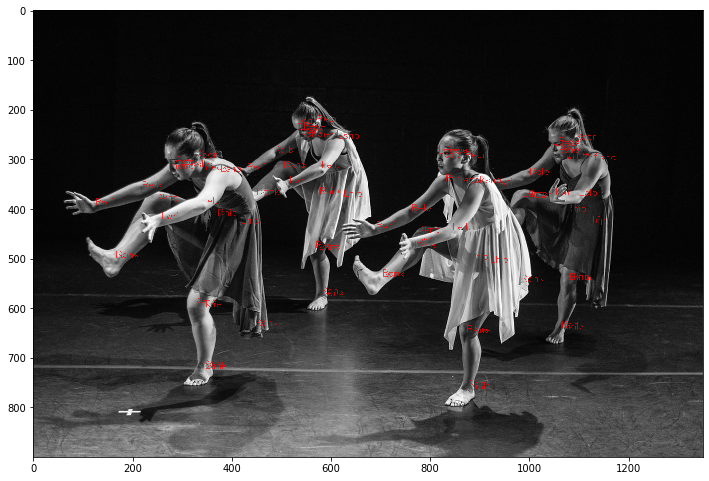

In [26]:
plot_body_parts(test_image, shared_pts)

In [21]:
subject_wise_loc = processor.subject_points(shared_pts)

In [22]:
subject_wise_loc = np.array(subject_wise_loc)

In [23]:
subject_wise_loc.shape # body parts, subject, X, Y

(17, 4, 2, 2)

In [27]:
subject_wise_loc

array([[[[ 3.470e+02,  3.440e+02],
         [ 8.660e+02,  8.310e+02]],

        [[ 2.550e+02,  2.540e+02],
         [ 5.780e+02,  5.380e+02]],

        [[ 2.950e+02,  2.860e+02],
         [ 1.095e+03,  1.055e+03]],

        [[ 3.220e+02,  3.160e+02],
         [ 3.470e+02,  3.160e+02]]],


       [[[ 3.470e+02,  3.480e+02],
         [ 8.660e+02,  9.000e+02]],

        [[ 2.550e+02,  2.580e+02],
         [ 5.780e+02,  6.140e+02]],

        [[ 2.950e+02,  3.020e+02],
         [ 1.095e+03,  1.131e+03]],

        [[ 3.220e+02,  3.250e+02],
         [ 3.470e+02,  3.770e+02]]],


       [[[ 3.440e+02,  4.040e+02],
         [ 8.310e+02,  7.620e+02]],

        [[ 2.540e+02,  2.860e+02],
         [ 5.380e+02,  4.850e+02]],

        [[ 2.860e+02,  3.310e+02],
         [ 1.055e+03,  1.000e+03]],

        [[ 3.160e+02,  3.580e+02],
         [ 3.160e+02,  2.190e+02]]],


       [[[ 4.040e+02,  4.380e+02],
         [ 7.620e+02,  6.910e+02]],

        [[ 2.860e+02,  3.220e+02],
         [ 4.850e+02,  

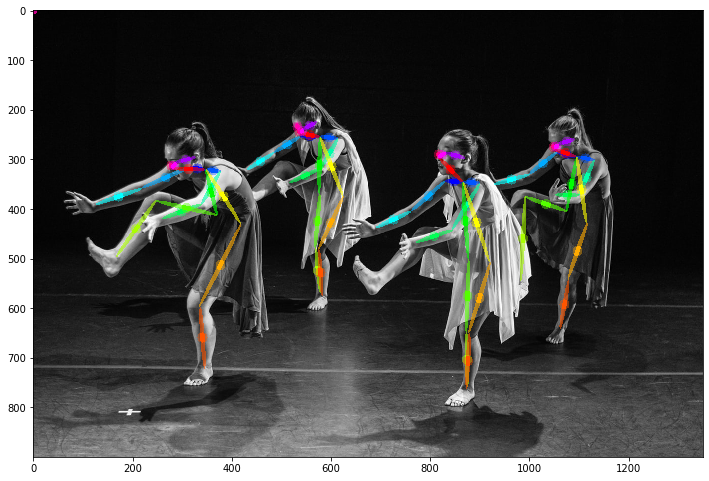

In [24]:
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

cmap = matplotlib.cm.get_cmap('hsv')

canvas = cv2.imread(test_image)
stickwidth = 4

for i in range(len(subject_wise_loc)):

    for n in range(len(subject_wise_loc[i])):
        
        cur_canvas = canvas.copy()
        Y = subject_wise_loc[i][n][1]
        X = subject_wise_loc[i][n][0]

        mX = np.mean(X)
        mY = np.mean(Y)

        length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
        angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
        polygon = cv2.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
        cv2.circle(canvas, (int(mY),int(mX)), 10, colors[i], thickness=-1)

        cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
        canvas = cv2.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
    
        
plt.imshow(canvas[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

In [25]:
cv2.imwrite('out.png', canvas)

True